<!---
Latex Macros
-->
$$
\newcommand{\bar}{\,|\,}
\newcommand{\Xs}{\mathcal{X}}
\newcommand{\Ys}{\mathcal{Y}}
\newcommand{\y}{\mathbf{y}}
\newcommand{\weights}{\mathbf{w}}
\newcommand{\balpha}{\boldsymbol{\alpha}}
\newcommand{\bbeta}{\boldsymbol{\beta}}
\newcommand{\aligns}{\mathbf{a}}
\newcommand{\align}{a}
\newcommand{\source}{\mathbf{s}}
\newcommand{\target}{\mathbf{t}}
\newcommand{\ssource}{s}
\newcommand{\starget}{t}
\newcommand{\repr}{\mathbf{f}}
\newcommand{\repry}{\mathbf{g}}
\newcommand{\x}{\mathbf{x}}
\newcommand{\prob}{p}
\newcommand{\vocab}{V}
\newcommand{\params}{\boldsymbol{\theta}}
\newcommand{\param}{\theta}
\DeclareMathOperator{\perplexity}{PP}
\DeclareMathOperator{\argmax}{argmax}
\DeclareMathOperator{\argmin}{argmin}
\newcommand{\train}{\mathcal{D}}
\newcommand{\counts}[2]{\#_{#1}(#2) }
\newcommand{\length}[1]{\text{length}(#1) }
\newcommand{\indi}{\mathbb{I}}
$$

# Assignment 3

## Introduction

In the last assignment, you will apply deep learning methods to solve a particular story understanding problem. Automatic understanding of stories is an important task in natural language understanding [[1]](http://anthology.aclweb.org/D/D13/D13-1020.pdf). Specifically, you will develop a model that given a sequence of sentences learns to sort these sentence in order to yield a coherent story [[2]](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/06/short-commonsense-stories.pdf). This sounds (and to an extent is) trivial for humans, however it is quite a difficult task for machines as it involves commonsense knowledge and temporal understanding.

## Goal

You are given a dataset of 45502 instances, each consisting of 5 sentences. Your system needs to ouput a sequence of numbers which represent the predicted order of these sentences. For example, given a story:

    He went to the store.
    He found a lamp he liked.
    He bought the lamp.
    Jan decided to get a new lamp.
    Jan's lamp broke.

your system needs to provide an answer in the following form:

    2	3	4	1	0

where the numbers correspond to the zero-based index of each sentence in the correctly ordered story. So "`2`" for "`He went to the store.`" means that this sentence should come 3rd in the correctly ordered target story. In this particular example, this order of indices corresponds to the following target story:

    Jan's lamp broke.
    Jan decided to get a new lamp.
    He went to the store.
    He found a lamp he liked.
    He bought the lamp.

## Resources

To develop your model(s), we provide a training and a development datasets. The test dataset will be held out, and we will use it to evaluate your models. The test set is coming from the same task distribution, and you don't need to expect drastic changes in it.

You will use [TensorFlow](https://www.tensorflow.org/) to build a deep learning model for the task. We provide a very crude system which solves the task with a low accuracy, and a set of additional functions you will have to use to save and load the model you create so that we can run it.

As we have to run the notebooks of each submission, and as deep learning models take long time to train, your notebook **NEEDS** to conform to the following requirements:
* You **NEED** to run your parameter optimisation offline, and provide your final model saved by using the provided function
* The maximum size of a zip file you can upload to moodle is 160MB. We will **NOT** allow submissions larger than that.
* We do not have time to train your models from scratch! You **NEED** to provide the full code you used for the training of your model, but by all means you **CANNOT** call the training method in the notebook you will send to us.
* We will run these notebooks automatically. If your notebook runs the training procedure, in addition to loading the model, and we need to edit your code to stop the training, you will be penalised with **-20 points**.
* If you do not provide a pretrained model, and rely on training your model on our machines, you will get **0 points**.
* Your submissions will be tested on the stat-nlp-book Docker image to ensure that it does not have any dependencies outside of those that we provide. If your submission fails to adhere to this requirement, you will get **0 points**.

Running time and memory issues:
* We have tested a possible solution on a mid-2014 MacBook Pro, and a few epochs of the model run in less than 3min. Thus it is possible to train a model on the data in reasonable time. However, be aware that you will need to run these models many times over, for a larger number of epochs (more elaborate models, trained on much larger datasets can train for weeks! However, this shouldn't be the case here.). If you find training times too long for your development cycle you can reduce the training set size. Once you have found a good solution you can increase the size again. Caveat: model parameters tuned on a smaller dataset may not be optimal for a larger training set.
* In addition to this, as your submission is capped by size, feel free to experiment with different model sizes, numeric values of different precisions, filtering the vocabulary size, downscaling some vectors, etc.

## Hints

A non-exhaustive list of things you might want to give a try:
- better tokenization
- experiment with pre-trained word representations such as [word2vec](https://code.google.com/archive/p/word2vec/), or [GloVe](http://nlp.stanford.edu/projects/glove/). Be aware that these representations might take a lot of parameters in your model. Be sure you use only the words you expect in the training/dev set and account for OOV words. When saving the model parameters, pre-rained word embeddings can simply be used in the word embedding matrix of your model. As said, make sure that this word embedding matrix does not contain all of word2vec or GloVe. Your submission is limited, and we will not allow uploading nor using the whole representations set (up to 3GB!)
- reduced sizes of word representations
- bucketing and batching (our implementation is deliberately not a good one!)
  - make sure to draw random batches from the data! (we do not provide this in our code!)
- better models:
  - stacked RNNs (see tf.contrib.rnn.MultiRNNCell)
  - bi-directional RNNs
  - attention
  - word-by-word attention
  - conditional encoding
  - get model inspirations from papers on [nlp.stanford.edu/projects/snli/](nlp.stanford.edu/projects/snli/)
  - sequence-to-sequence encoder-decode architecture for producing the right ordering
- better training procedure:
  - different training algorithms
  - dropout on the input and output embeddings (see tf.nn.dropout)
  - L2 regularization (see tf.nn.l2_loss)
  - gradient clipping (see tf.clip_by_value or tf.clip_by_norm)
- model selection:
  - early stopping
- hyper-parameter optimization (e.g. random search or grid search (expensive!))
    - initial learning rate
    - dropout probability
    - input and output size
    - L2 regularization
    - gradient clipping value
    - batch size
    - ...
- post-processing
  - for incorporating consistency constraints

## Setup Instructions
It is important that this file is placed in the **correct directory**. It will not run otherwise. The correct directory is

    DIRECTORY_OF_YOUR_BOOK/assignments/2017/assignment3/problem/group_X/
    
where `DIRECTORY_OF_YOUR_BOOK` is a placeholder for the directory you downloaded the book to, and in `X` in `group_X` contains the number of your group.

After you placed it there, **rename the notebook file** to `group_X.ipynb`.

The notebook is pre-set to save models in

    DIRECTORY_OF_YOUR_BOOK/assignments/2017/assignment3/problem/group_X/model/

Be sure not to tinker with that directory - we expect your submission to contain a `model` subdirectory with a single saved model! 
The saving procedure might overwrite the latest save, or not. Make sure you understand what it does, and upload only a single model! (for more details check tf.train.Saver)

## General Instructions
This notebook will be used by you to provide your solution, and by us to both assess your solution and enter your marks. It contains three types of sections:

1. **Setup** Sections: these sections set up code and resources for assessment. **Do not edit, move nor copy these cells**.
2. **Assessment** Sections: these sections are used for both evaluating the output of your code, and for markers to enter their marks. **Do not edit, move, nor copy these cells**.
3. **Task** Sections: these sections require your solutions. They may contain stub code, and you are expected to edit this code. For free text answers simply edit the markdown field.  

**If you edit, move or copy any of the setup, assessments and mark cells, you will be penalised with -20 points**.

Note that you are free to **create additional notebook cells** within a task section. 

Please **do not share** this assignment nor the dataset publicly, by uploading it online, emailing it to friends etc.

## Submission Instructions

To submit your solution:

* Make sure that your solution is fully contained in this notebook. Make sure you do not use any additional files other than your saved model.
* Make sure that your solution runs linearly from start to end (no execution hops). We will run your notebook in that order.
* **Before you submit, make sure your submission is tested on the stat-nlp-book Docker setup to ensure that it does not have any dependencies outside of those that we provide. If your submission fails to adhere to this requirement, you will get 0 points**.
* **If running your notebook produces a trivially fixable error that we spot, we will correct it and penalise you with -20 points. Otherwise you will get 0 points for that solution.**
* **Rename this notebook to your `group_X`** (where `X` is the number of your group), and adhere to the directory structure requirements, if you have not already done so. ** Failure to do so will result in -1 point.**
* Download the notebook in Jupyter via *File -> Download as -> Notebook (.ipynb)*.
* Your submission should be a zip file containing the `group_X` directory, containing `group_X.ipynb` notebook, and the `model` directory with the saved model
* Upload that file to the Moodle submission site.

## <font color='green'>Setup 1</font>: Load Libraries
This cell loads libraries important for evaluation and assessment of your model. **Do not change, move or copy it.**

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
%matplotlib inline
#! SETUP 1 - DO NOT CHANGE, MOVE NOR COPY
import sys, os
_snlp_book_dir = "../../../../../"
sys.path.append(_snlp_book_dir)
# docker image contains tensorflow 0.10.0rc0. We will support execution of only that version!
import statnlpbook.nn as nn

import tensorflow as tf
import numpy as np

## <font color='green'>Setup 2</font>: Load Training Data

This cell loads the training data. **Do not edit the next cell, nor copy/duplicate it**. Instead refer to the variables in your own code, and slice and dice them as you see fit (but do not change their values). 
For example, no one stops you from introducing, in the corresponding task section, `my_train` and `my_dev` variables that split the data into different folds.   

In [2]:
#! SETUP 2 - DO NOT CHANGE, MOVE NOR COPY
data_path = _snlp_book_dir + "data/nn/"
data_train = nn.load_corpus(data_path + "train.tsv")
data_dev = nn.load_corpus(data_path + "dev.tsv")
assert(len(data_train) == 45502)

### Data Structures

Notice that the data is loaded from tab-separated files. The files are easy to read, and we provide the loading functions that load it into a simple data structure. Feel free to check details of the loading.

The data structure at hand is an array of dictionaries, each containing a `story` and the `order` entry. `story` is a list of strings, and `order` is a list of integer indices:

In [3]:
data_train[0]

{'order': [3, 2, 1, 0, 4],
 'story': ['His parents understood and decided to make a change.',
  'The doctors told his parents it was unhealthy.',
  'Dan was overweight as well.',
  "Dan's parents were overweight.",
  'They got themselves and Dan on a diet.']}

## <font color='blue'>Task 1</font>: Model implementation

Your primary task in this assignment is to implement a model that produces the right order of the sentences in the dataset.

### Preprocessing pipeline

First, we construct a preprocessing pipeline, in our case `pipeline` function which takes care of:
- out-of-vocabulary words
- building a vocabulary (on the train set), and applying the same unaltered vocabulary on other sets (dev and test)
- making sure that the length of input is the same for the train and dev/test sets (for fixed-sized models)

You are free (and encouraged!) to do your own input processing function. Should you experiment with recurrent neural networks, you will find that you will need to do so.

<font color='RED'><strong>TOKENIZATION</strong></font>

In [4]:
import re

class MacIntyreContractions:
    """
    List of contractions adapted from Robert MacIntyre's tokenizer.
    """
    CONTRACTIONS2 = [r"(?i)\b(d)(?#X)('ye)\b",
                     # r"(?i)\b(gim)(?#X)(me)\b",
                     # r"(?i)\b(gon)(?#X)(na)\b",
                     # r"(?i)\b(can)(?#X)(not)\b",
                     # r"(?i)\b(got)(?#X)(ta)\b",
                     # r"(?i)\b(lem)(?#X)(me)\b",
                     r"(?i)\b(mor)(?#X)('n)\b"]
    CONTRACTIONS3 = [r"(?i) ('t)(?#X)(is)\b", r"(?i) ('t)(?#X)(was)\b"]
    CONTRACTIONS4 = [r"(?i)\b(whad)(dd)(ya)\b",
                     r"(?i)\b(wha)(t)(cha)\b"]

class TreebankWordTokenizer():

    #starting quotes
    STARTING_QUOTES = [
        (re.compile(r'^\"'), r'``'),
        (re.compile(r'(``)'), r' \1 '),
        (re.compile(r'([ (\[{<])"'), r'\1 `` '),
    ]

    #punctuation
    PUNCTUATION = [
        (re.compile(r'([:,])([^\d])'), r' \1 \2'),
        (re.compile(r'([:,])$'), r' \1 '),
        (re.compile(r'\.\.\.'), r' ... '),
        (re.compile(r'[;@#$%&]'), r' \g<0> '),
        (re.compile(r'([^\.])(\.)([\]\)}>"\']*)\s*$'), r'\1 \2\3 '), # Handles the final period.
        (re.compile(r'[?!]'), r' \g<0> '),

        (re.compile(r"([^'])' "), r"\1 ' "),
    ]
    TIME = [(re.compile(r'([0-9]*[0-9])*:[0-5][0-9]*(a|p|A|P)(m|M)'), r'\1 \2\3')]
    # Pads parentheses
    PARENS_BRACKETS = (re.compile(r'[\]\[\(\)\{\}\<\>]'), r' \g<0> ')

    # Optionally: Convert parentheses, brackets and converts them to PTB symbols.
    CONVERT_PARENTHESES = [
        (re.compile(r'\('), '-LRB-'), (re.compile(r'\)'), '-RRB-'),
        (re.compile(r'\['), '-LSB-'), (re.compile(r'\]'), '-RSB-'),
        (re.compile(r'\{'), '-LCB-'), (re.compile(r'\}'), '-RCB-')
    ]

    DOUBLE_DASHES = (re.compile(r'--'), r' -- ')

    #ending quotes
    ENDING_QUOTES = [
        (re.compile(r'"'), " '' "),
        (re.compile(r'(\S)(\'\')'), r'\1 \2 '),
        (re.compile(r"([^' ])('[sS]|'[mM]|'[dD]|') "), r"\1 \2 "),
        (re.compile(r"([^' ])('ll|'LL|'re|'RE|'ve|'VE|n't|N'T) "), r"\1 \2 "),
    ]

    # List of contractions adapted from Robert MacIntyre's tokenizer.
    _contractions = MacIntyreContractions()
    CONTRACTIONS2 = list(map(re.compile, _contractions.CONTRACTIONS2))
    CONTRACTIONS3 = list(map(re.compile, _contractions.CONTRACTIONS3))

    def tokenize(self, text, convert_parentheses=False, return_str=False):
        for regexp, substitution in self.STARTING_QUOTES:
            text = regexp.sub(substitution, text)

        for regexp, substitution in self.PUNCTUATION:
            text = regexp.sub(substitution, text)
        for regexp, subtitution in self.TIME:
            text = regexp.sub(subtitution,text)
            
        # Handles parentheses.
        regexp, substitution = self.PARENS_BRACKETS
        text = regexp.sub(substitution, text)
        # Optionally convert parentheses
        if convert_parentheses:
            for regexp, substitution in self.CONVERT_PARENTHESES:
                text = regexp.sub(substitution, text)

        # Handles double dash.
        regexp, substitution = self.DOUBLE_DASHES
        text = regexp.sub(substitution, text)

        #add extra space to make things easier
        text = " " + text + " "

        for regexp, substitution in self.ENDING_QUOTES:
            text = regexp.sub(substitution, text)

        for regexp in self.CONTRACTIONS2:
            text = regexp.sub(r' \1 \2 ', text)
        for regexp in self.CONTRACTIONS3:
            text = regexp.sub(r' \1 \2 ', text)

        # We are not using CONTRACTIONS4 since
        # they are also commented out in the SED scripts
        # for regexp in self._contractions.CONTRACTIONS4:
        #     text = regexp.sub(r' \1 \2 \3 ', text)

        return text if return_str else text.split()


    def span_tokenize(self, text):

        raw_tokens = self.tokenize(text)

        # Convert converted quotes back to original double quotes
        # Do this only if original text contains double quote(s)
        if '"' in text:
            # Find double quotes and converted quotes
            matched = [m.group() for m in re.finditer(r'[(``)(\'\')(")]+', text)]
            
            # Replace converted quotes back to double quotes
            tokens = [matched.pop(0) if tok in ['"', "``", "''"] else tok for tok in raw_tokens]
        else:
            tokens = raw_tokens

        return align_tokens(tokens, text)

<font color= "red"><strong>PIPELINE</strong></font>

In [5]:
import random

_treebank_word_tokenizer = TreebankWordTokenizer()


def tokenize(sent):
    return [token for token in _treebank_word_tokenizer.tokenize(sent)]



#############################
import collections
from collections import defaultdict
import pprint

# fname = "glove6B/glove.6B.100d.txt"
fname = "./model/embeddings.txt"
num_dim = 300

with open(fname) as f:
    content = f.readlines()
    line = [x.strip() for x in content] 

    word_embeddings = collections.defaultdict(lambda: collections.defaultdict(float))
    word_embeddings_matrix = []

    word_embeddings['<PAD>']['id'] = len(word_embeddings)
    word_embeddings['<PAD>']['embedding'] = [random.uniform(0,0) for i in range(num_dim)]
    word_embeddings_matrix.append(  word_embeddings['<PAD>']['embedding']  )

    word_embeddings['<OOV>']['id'] = len(word_embeddings)
    word_embeddings['<OOV>']['embedding'] = [random.uniform(-1,1) for i in range(num_dim)]
    word_embeddings_matrix.append(  word_embeddings['<OOV>']['embedding']  )

    for l in line:
        items = l.split(' ')
        word = items[0]
        word_embeddings[word]['id'] = len(word_embeddings)
        word_embeddings[word]['embedding'] = [float(x) for x in items[1:]]
        word_embeddings_matrix.append(  word_embeddings[word]['embedding']  )

    word_embeddings_matrix = np.array(word_embeddings_matrix)

    # print ("word_embeddings_matrix len: ", len(word_embeddings_matrix))
    # print ("word_embeddings_matrix shape: ", word_embeddings_matrix.shape)
    # print (word_embeddings_matrix[0:1])
    # print (word_embeddings['unk'])
###############################

def pipeline(data, vocab=None, max_sent_len_=None):
    is_ext_vocab = True
    if vocab is None:
        is_ext_vocab = False
        vocab = {'<PAD>': 0, '<OOV>': 1}

    max_sent_len = -1
    data_sentences = []
    data_orders = []
    for instance in data:
        sents = []
        for sentence in instance['story']:
            sent = []
            tokenized =tokenize(sentence)
            for token in tokenized:
                token = token.lower()
                if token in word_embeddings:
                    vocab[token] = len(vocab)
                if token not in word_embeddings:
                    token_vector = word_embeddings['<OOV>']['id']
                else:
                    token_vector = word_embeddings[token]['id']
                sent.append(token_vector)
            if len(sent) > max_sent_len:
                max_sent_len = len(sent)
            sents.append(sent)
        data_sentences.append(sents)
        data_orders.append(instance['order'])

    if max_sent_len_ is not None:
        max_sent_len = max_sent_len_
    
    data_len = len(data_sentences)
    out_sentences = np.full([data_len, 5, max_sent_len], word_embeddings['<PAD>']['id'], dtype=np.int32)
    global out 
    out = out_sentences[:]
    
    print ('max sent len is: ', max_sent_len)
    
    for i, elem in enumerate(data_sentences):
        for j, sent in enumerate(elem):
            if len(sent) > max_sent_len:
                print (len(sent)," is bigger than max len sent: ", max_sent_len)
                out_sentences[i, j, 0:max_sent_len] = sent[0:max_sent_len]
            else:
                out_sentences[i, j, 0:len(sent)] = sent[0:len(sent)]

    out_orders = np.array(data_orders, dtype=np.int32)

    min_after_dequeue = 10000
    _batch_size = 128
    capacity = min_after_dequeue + 3 * _batch_size
    out_sentences_batch, out_orders_batch = tf.train.shuffle_batch(
          [out_sentences, out_orders], batch_size=_batch_size, capacity=capacity,
          min_after_dequeue=min_after_dequeue)

    
    return out_sentences, out_orders, vocab

In [6]:
# convert train set to integer IDs
train_stories, train_orders, vocab = pipeline(data_train)

max sent len is:  21


You need to make sure that the `pipeline` function returns the necessary data for your computational graph feed - the required inputs in this case, as we will call this function to process your dev and test data. If you do not make sure that the same pipeline applied to the train set is applied to other datasets, your model may not work with that data!

In [7]:
# get the length of the longest sentence
max_sent_len = train_stories.shape[2]

# convert dev set to integer IDs, based on the train vocabulary and max_sent_len
dev_stories, dev_orders, _ = pipeline(data_dev, vocab, max_sent_len_=max_sent_len)

max sent len is:  21


You can take a look at the result of the `pipeline` with the `show_data_instance` function to make sure that your data loaded correctly:

In [8]:
nn.show_data_instance(dev_stories, dev_orders, vocab, 1870)

Input:
 Story:
  <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>
  <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> rhinestones <OOV>
  rhinestones <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>
  <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>
  <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>
 Order:
  [1 4 0 2 3]

Desired story:
  rhinestones <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>
  <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>
  <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>
  <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>
  <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> rhinestones <OOV>


### Model

The model we provide is a rudimentary, non-optimised model that essentially represents every word in a sentence with a fixed vector, sums these vectors up (per sentence) and puts a softmax at the end which aims to guess the order of sentences independently.

First we define the model parameters:

In [9]:
word_vector_matrix = []
word_vector_matrix = word_embeddings_matrix
### MODEL PARAMETERS ###
target_size = 5
vocab_size = word_vector_matrix.shape[0]
input_size = word_vector_matrix.shape[1]
output_size = 5

and then we define the model

<font color='red' ><strong>LSTM SENTENCE WISE</strong></font>

In [10]:
from tensorflow.contrib import rnn
learning_rate = 0.01
num_hidden = 128
num_features = 64
timesteps = max_sent_len
lstm_output_size = 64

class BasicRNN():
    def __init__(self,num_hidden, num_features, timesteps ):
        self.num_hidden = num_hidden 
        self.num_features = num_features
        self.timesteps = timesteps


        self.weights = {
            'out': tf.Variable(tf.random_normal([self.num_hidden, self.num_features]))
        }
        self.biases = {
            'out': tf.Variable(tf.random_normal([self.num_features]))
        }

    def lstm_cell(self):
          return rnn.BasicLSTMCell(self.num_hidden, forget_bias=1.0)

    def buildRNN(self, x):
        # Forward direction cell

        rnn_cell = rnn.MultiRNNCell([self.lstm_cell() for _ in range(4)])
        #x = tf.unstack(x, self.timesteps, 1) 
        # x = timesteps x batch_size x input_size
        outputs, states = rnn.static_rnn(rnn_cell, x, dtype=tf.float32)

        return tf.matmul(outputs[-1], self.weights['out']) + self.biases['out']

    def buildBidirectionalRNN (self, x):
        # Forward direction cell
        lstm_fw_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)
        # Backward direction cell
        lstm_bw_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)
        # Get lstm cell output
        try:
            outputs, _, _ = rnn.static_bidirectional_rnn(lstm_fw_cell, lstm_bw_cell, x,
                                                  dtype=tf.float32)
        except Exception: # Old TensorFlow version only returns outputs not states
            outputs = rnn.static_bidirectional_rnn(lstm_fw_cell, lstm_bw_cell, x,
                                            dtype=tf.float32)
        outs = []
        for output in outputs:
             outs.append( tf.matmul(output, self.bi_weights['out']) + self.biases['out'])
        return outs
        
    def buildDynaimcRNN(self, x, batch_size):
        
        lstm_cell = tf.contrib.rnn.BasicLSTMCell(self.num_hidden)
        outputs, states = tf.contrib.rnn.static_rnn(lstm_cell, x, dtype=tf.float32,
                                sequence_length=self.seqlen)
#         outputs = tf.stack(outputs)
#         outputs = tf.transpose(outputs, [1, 0, 2])
#         # Hack to build the indexing and retrieve the right output.
#         batch_size = tf.shape(outputs)[0]
#         # Start indices for each sample
#         index = tf.range(0, batch_size) * self.timesteps + (self.seqlen - 1)
#         # Indexing
#         outputs = tf.gather(tf.reshape(outputs, [-1, self.num_hidden]), index)
        outputs = tf.reshape(tf.stack(outputs), [-1, lstm_cell.output_size])
#         num_partitions = 2
#         res_out = tf.dynamic_partition(outputs, self.partitions, num_partitions)
        # Linear activation, using outputs computed above
        return tf.matmul(outputs, self.weights['out']) + self.biases['out']
    

In [11]:
beta = 0.1

### MODEL ###
tf.reset_default_graph()
tf.initialize_all_variables()


## PLACEHOLDERS
story = tf.placeholder(tf.int64, [None, None, None], "story")        # [batch_size x 5 x max_length]
order = tf.placeholder(tf.int64, [None, None], "order")              # [batch_size x 5]

batch_size = tf.shape(story)[0]

sentences = [tf.reshape(x, [batch_size, -1]) for x in tf.split(axis=1, num_or_size_splits=5, value=story)]  # 5 times [batch_size x max_length]

# Word embeddings
initializer = tf.constant_initializer(word_vector_matrix)
embeddings = tf.get_variable("W", [vocab_size, input_size], initializer=initializer)

sentences_embedded = [tf.nn.embedding_lookup(embeddings, sentence)   # 5 * [batch_size x max_seq_length x input_size]
                      for sentence in sentences]

basicRNN = BasicRNN(num_hidden, num_features, timesteps )

# x [batch_size*5, input_size]

to_single_sentence = tf.concat(sentences_embedded , axis = 0)

x =  tf.unstack(to_single_sentence, timesteps, 1)


# lstmOutput  [batch_size*5, output_size]
lstmOutput = basicRNN.buildRNN( x )

# separate lstmOutput 5x[batch_size, output_size]
hs = tf.reshape(lstmOutput,[5, -1, lstm_output_size] )
hs_transpose = tf.transpose(hs, [1,0,2])

hs_reshape = tf.reshape(hs_transpose, [-1, 5*lstm_output_size]) #[batch_size, 5*output]

logits_flat = tf.contrib.layers.linear(hs_reshape, 5 * target_size)    # [batch_size x 5*target_size]
logits = tf.reshape(logits_flat, [-1, 5, target_size])        # [batch_size x 5 x target_size]

# loss + regularization
regularizer = tf.nn.l2_loss(embeddings)
loss = tf.reduce_sum(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=order))
loss = tf.reduce_mean(loss + beta * regularizer)

# prediction function
unpacked_logits = [tensor for tensor in tf.unstack(logits, axis=1)]
softmaxes = [tf.nn.softmax(tensor) for tensor in unpacked_logits]
softmaxed_logits = tf.stack(softmaxes, axis=1)
predict = tf.arg_max(softmaxed_logits, 2)


In [12]:
# sent2vec codes
# a = tf.reshape(lstmOutput, [5,-1,64])
# sentence_to_vec = tf.unstack(a, 5, 0)

# # 5 x [batch x output_size]
# sent_lstmOutput = basicRNN.buildBidirectionalRNN( sentence_to_vec )

# hs_reshape = tf.concat(sent_lstmOutput, axis = 1)


We built our model, together with the loss and the prediction function, all we are left with now is to build an optimiser on the loss:

In [13]:
#opt_op = tf.train.AdamOptimizer(0.01).minimize(loss)

### Model training 

We defined the preprocessing pipeline, set the model up, so we can finally train the model

In [14]:
# BATCH_SIZE = 25

# with tf.Session() as sess:
#     sess.run(tf.initialize_all_variables())
#     n = train_stories.shape[0]

#     for epoch in range(5):
#         print('----- Epoch', epoch, '-----')
#         total_loss = 0
#         for i in range(n // BATCH_SIZE):
#             inst_story = train_stories[i * BATCH_SIZE: (i + 1) * BATCH_SIZE]
#             inst_order = train_orders[i * BATCH_SIZE: (i + 1) * BATCH_SIZE]
#             feed_dict = {story: inst_story, order: inst_order}
#             _, current_loss = sess.run([opt_op, loss], feed_dict=feed_dict)
#             total_loss += current_loss

#         print(' Train loss:', total_loss / n)

# #         train_feed_dict = {story: train_stories, order: train_orders}
# #         train_predicted = sess.run(predict, feed_dict=train_feed_dict)
# #         train_accuracy = nn.calculate_accuracy(train_orders, train_predicted)
# #         print(' Train accuracy:', train_accuracy)
        
#         dev_feed_dict = {story: dev_stories, order: dev_orders}
#         dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
#         dev_accuracy = nn.calculate_accuracy(dev_orders, dev_predicted)
#         print(' Dev accuracy:', dev_accuracy)

        
    
#     nn.save_model(sess)

## <font color='red'>Assessment 1</font>: Assess Accuracy (40 pts) 

We assess how well your model performs on an unseen test set. We will look at the accuracy of the predicted sentence order, on sentence level, and will score them as followis:

* 0 - 10 pts: 45% <= accuracy < 50%, linear
* 10 - 20 pts: 50% <= accuracy < 55, linear
* 20 - 40 pts: 55 <= accuracy < 60, linear
* extra 0-10 pts: 60 <= accuracy < 70, linear

The **linear** mapping maps any accuracy value between the lower and upper bound linearly to a score. For example, if your model's accuracy score is $acc=54.5\%$, then your score is $10 + 10\frac{acc-50}{55-50}$.

Change the following lines so that they construct the test set in the same way you constructed the dev set in the code above. We will insert the test set instead of the dev set here. **`test_feed_dict` variable must stay named the same**.

In [15]:
# LOAD THE DATA
data_test = nn.load_corpus(data_path + "dev.tsv")
# make sure you process this with the same pipeline as you processed your dev set
test_stories, test_orders, _ = pipeline(data_test, vocab=vocab, max_sent_len_=max_sent_len)
f
# THIS VARIABLE MUST BE NAMED `test_feed_dict`
test_feed_dict = {story: test_stories, order: test_orders}

max sent len is:  21


The following code loads your model, computes accuracy, and exports the result. **DO NOT** change this code.

In [16]:
#! ASSESSMENT 1 - DO NOT CHANGE, MOVE NOR COPY
with tf.Session() as sess:
    # LOAD THE MODEL
    saver = tf.train.Saver()
    saver.restore(sess, './model/model.checkpoint')
    
    # RUN TEST SET EVALUATION
    dev_predicted = sess.run(predict, feed_dict=test_feed_dict)
    dev_accuracy = nn.calculate_accuracy(dev_orders, dev_predicted)

dev_accuracy

0.56098343132014961

## <font color='orange'>Mark</font>:  Your solution to Task 1 is marked with ** __ points**. 
---

## <font color='blue'>Task 2</font>: Describe your Approach

Enter a 1000 words max description of your approach **in this cell**.
Make sure to provide:
- an **error analysis** of the types of errors your system makes
- compare your system with the model we provide, focus on differences and draw useful comparations between them

Should you need to include figures in your report, make sure they are Python-generated (matplotlib, seaborn, bokeh are all included in the stat-nlp-book Docker image). For that, feel free to create new cells after this cell (before Assessment 2 cell). Link online images at your risk.

   ## Error Analysis:

### Limitation of Our LSTM Model
In the current model we are using 4 layers of LSTM followed by a dense layer with a softmax function to predict the order number of the sentence. The problem with this method is that each sentence is handled independently and has to be given an order number (0,1,2,3,4).  Therefore, the other sentences in that same story are not considered during the classification problem and top accuracies won’t be achieved via this method since when predicting a story, all the other sentences in that story also has to be taken into account inside the model.

### Possible Better Model
A better way is to use a seq2seq model to fix this issue. Where the 5 sentences are passed into an RNN encoder to represent it as a context vector. Each sentence has a "START" and "STOP" token tag added to the beggining and ending of it respectively. We then use another RNN decoder to decode this context vector into an ouput sequence (order).


### Cases of Low Accurancy
When looking at the order of the sentences predicted for a story, we realized that there were two majority cases where incorrect orders were predicted for a story:

##### 1) OOV
In the cases were there were a lot of OOV tokens (words that we did not have an embedding for), the model could not predict the order of the sentences very well. We noticed that many of these tokens were either rare vocabulary words used or person names. In general one could replace these names or websites with "NAME" tags and then assign a vector representation for the tags rather than for each individual names. For the rare vocabulary words, a simple way is to extend our word embedding to contain more words.

##### 2) PAD
For sentences which involved a lot of "PADDING" tags at the end of it, the model was also very likely to predict the wrong sequence of orders for the story sentences. One solution to this is to use bucketing to group sentences of different lengths together. When we implemented the seq2seq model using Keras to get the 58% dev set accuracy, this wasn’t a problem because only the end of the story (5 sentences) were "PADDED" and not each individual sentence. Unfortunately, the seq2seq model was implemented using an add-on to keras and we couldn't make the pure tensorflow implementation working.

##### 3) Mis-spelling
Another minor issue for the existance of OOV tokens was that a lot of training words/tokens had spelling mistakes (like "saddly”, “sandwhich”, “neiter”). Since these words don’t exist in the GloVe word embeddings, they will get the embedding of the “OOV” token. If a script was ran during pre-processing to spell-check and correct these tokens, better results might have been achieved.


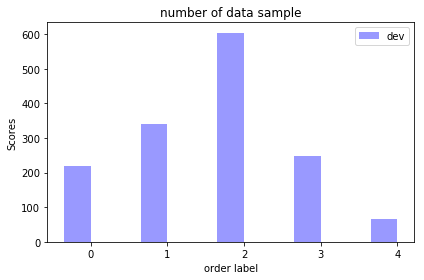

In [17]:
import matplotlib.pyplot as plt;from matplotlib.ticker import MaxNLocator;from collections import namedtuple;n_groups = 5;means_men = (220, 340, 604, 247, 65);fig, ax = plt.subplots();index = np.arange(n_groups);bar_width = 0.35;opacity = 0.4;error_config = {'ecolor': '0.3'};rects1 = ax.bar(index, means_men, bar_width,alpha=opacity, color='b', error_kw=error_config,label='dev');ax.set_xlabel('order label');ax.set_ylabel('Scores');ax.set_title('number of data sample');ax.set_xticks(index + bar_width / 2);ax.set_xticklabels(('0', '1', '2', '3', '4'));ax.legend();fig.tight_layout();plt.show()

The figure shows which the wrong prediction the model makes for each of the order label. As we can see, the "2" label gets the worest result. 

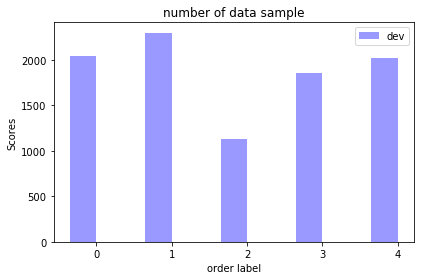

In [18]:
import matplotlib.pyplot as plt;from matplotlib.ticker import MaxNLocator;from collections import namedtuple;n_groups = 5;means_men = (2041, 2299, 1131, 1858, 2026);fig, ax = plt.subplots();index = np.arange(n_groups);bar_width = 0.35;opacity = 0.4;error_config = {'ecolor': '0.3'};rects1 = ax.bar(index, means_men, bar_width,alpha=opacity, color='b', error_kw=error_config,label='dev');ax.set_xlabel('order label');ax.set_ylabel('Scores');ax.set_title('number of data sample');ax.set_xticks(index + bar_width / 2);ax.set_xticklabels(('0', '1', '2', '3', '4'));ax.legend();fig.tight_layout();plt.show()

This figure shows how many predictions the model makes for each order label. As it shows, the result corresponds to the previous figure, the model is not confident in making prediction on label "2"

## Model Explanation:

Improvement We Made Based on the Provided Model

### Pre-processing

* Tokenization

The tokenization provided in the original code only split by white spaces “ “. But that is not a good tokenization because for example “the.” and “the” are considered different tokens because of the period sign.
We created our tokenization method based on the 
    - twitter tree bank tokenizer. 
We added:
    - Time 
    - Data
    - Garbled text (\x1a) 
    - URL 

*  Word Embeddings

For the story ordering problem, we need word embeddings as input to our model. This can either be pre-trained like GloVe or Word2Vec embeddings or can be trained using unsupervised learning using the training stories we have (their texts). However in the provided model, neither is done. A word embedding matrix is randomly intitialized with values which is inherently non-sense if used within a model.

We took 1.6B 300-D word embeddings from GloVe and only included the words which appeared in the training set. We also added two word embeddings:
    - <PAD> was a 300D all 0 vectors
    - <OOV> was a randomly initialized vector. 
The 1.6 Billion word 300-D word embeddings was narrowed down to only contain words in the training set. (This was ran on AWS due to the large size of the file)

### Model

* Model Composition

    In the original codes, there's only one dense layer, and the model takes the sum of sentence vector to learning the pattern. This model does not ultilize the features of sentences and words, so it gives low accurance. By analyzing the characteriscts of this story ordering task, we decided to apply rnn and lstm on the sentences to learning their patterns. We feed sentences to the static_rnn with lstm cells, and pass the result to the dense layer for the final classification process. Here's our detailed implementation:

    - LSTM: tensorflow BasicLSTM Cell
    - Stacked StaticRNN with 4 LSTM Cells 
    - Fully-Connected Layer
      A Fully-connected layer is added to the network to give the output result.
    - Dropout layer added to the fully-connected layer, which can prevent the model from overfitting


* Optimizer

    In the original model, Adam Optimizer is applied, althought Adam is well-known to be the best optimizer, we tested AdadetaOptimizer to see if there's any difference.    
    - AdamOptimizer with learning rate 0.01: 
        low train loss, converge quickly, easy to overfit
    - AdadeltaOptimizer with learning rate 0.1: 
        high train loss, coverge slowly, not easy to overfit  
        - The difference of the dev accuracy and training loss is illustrated in the line chart below
   
    
* Regularization

    We tried various regularization techniques such as recurrent dropout in the lstm layers and L2 regularizers in the word embeddings. The L2 regularizers performed better. Regularization is used to avoid overfitting and to make sure that the model generalizes on unseen data. Grid hyper-parameter search was then used to pick the best Beta value for the L2 regularizer for the embedding weights. 
    
    - Adopted: L2 regularization is applied on the loss with beta value 0.1


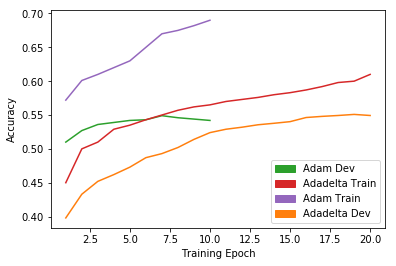

In [19]:
import matplotlib.patches as mpatches;orange_patch = mpatches.Patch(color='C1', label='Adadelta Dev');green_patch = mpatches.Patch(color='C2', label='Adam Dev');plt.plot([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], [0.398,0.433,0.452,0.462,0.473,0.487,0.493,0.502,0.514,0.524,0.529,0.532,0.5356,0.5378,0.5402,  0.5463, 0.548, 0.5493,0.5509,0.5493],"C1",label="Adadelta Dev");plt.plot([1, 2, 3, 4,5,6,7,8,9,10],[0.510, 0.527, 0.536,0.539,0.542,0.543,0.549,0.546,0.544,0.542], "C2",label="Adam Dev");plt.ylabel('Accuracy');plt.xlabel('Training Epoch');purple_patch = mpatches.Patch(color='C4', label='Adam Train');red_patch = mpatches.Patch(color='C3', label='Adadelta Train');plt.legend(handles=[green_patch, red_patch]);plt.plot([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], [0.45,0.50,0.51,0.529,0.535,0.543,0.550,0.557,0.562,0.565,0.570,0.573,0.576,0.580,0.583,0.587,0.592 , 0.598,0.60,0.61],"C3",label="Adadelta Train");plt.plot([1, 2, 3, 4,5,6,7,8,9,10],[0.572, 0.601, 0.61,0.62,0.63,0.65,0.67,0.675,0.682,0.69], "C4",label="Adam Train");plt.legend(handles=[green_patch, red_patch,purple_patch, orange_patch]);plt.show();

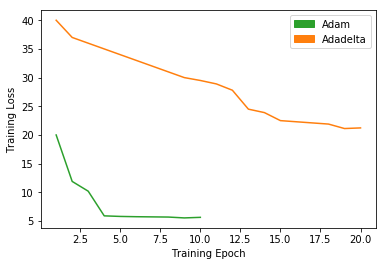

In [20]:
red_patch = mpatches.Patch(color='C1', label='Adadelta');green_patch = mpatches.Patch(color='C2', label='Adam');plt.legend(handles=[green_patch, red_patch]);plt.plot([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], [40,37,36,35,34,33,32,31,30,29.5,28.9,27.8,24.5,23.9,22.5,22.3, 22.1, 21.9,21.12,21.23],"C1",label="Adadelta");plt.plot([1, 2, 3, 4,5,6,7,8,9,10],[20, 11.9, 10.2,5.9,5.8,5.75,5.72,5.69,5.54,5.64], "C2",label="Adam");plt.ylabel('Training Loss');plt.xlabel('Training Epoch');plt.show()

     
### Training

* Early Stopping

Early stopping was implemented to select and save the best model during training which gave the best dev set accuracy. This fixes the problem of having to play around with the number of epochs as a hyperparamter and saves alot of time.

* Shuffle Batching

We applied tensorflow shuffle batching in the pipeline in order to get more randomized data sample from the data set. 

* Hyper-parameter Tuning

    - Optimizer Learning rate:
     <table>
        <tr> 
            <th>Optimizer learning rate</th>
            <th> Highest score </th>
        </tr>
        <tr>
            <td> 0.1</td>
            <td>55.4</td>
        </tr>
        <tr>
            <td> 0.01</td>
            <td>56.0</td>
        </tr>
           <tr>
            <td> 0.001</td>
            <td>54.4</td>
        </tr>
        </table>
    - Regularization rate: 
    <table>
    <tr> 
        <th>L2 rate</th>
        <th> Highest score </th>
    </tr>
    <tr>
        <td> 0.1</td>
        <td>56.0</td>
    </tr>
    <tr>
        <td> 0.01</td>
        <td>55.4</td>
    </tr>
     <tr>
        <td> 0.001</td>
        <td>54.9</td>
    </tr>
    </table>
    
    - Batch size:
      we tried 32, 64, 128, 256, 512 for batch size, and we got the results showing that smaller batch size gave higher train loss, while larger batch size gave smaller train loss. With batch size 256, we can get the best result. 
       <table>
    <tr> 
        <th> Batch size</th>
        <th> Highest score </th>
    </tr>
    <tr>
        <td> 64</td>
        <td>53.9</td>
    </tr>
    <tr>
        <td> 128</td>
        <td>55.4</td>
    </tr>
     <tr>
        <td> 256</td>
        <td>56.1</td>
    </tr>
    <tr>
        <td> 512</td>
        <td>54.1</td>
    </tr>
    </table>
    
      
### Other Attempts We Made

* Word to Vector Model

    * Bi-directional rnn
    
    We got 54.2 with bidirectional rnn. The possible reason is that we added padding to each of sentences, so that the forward and backward learning cannot improve the performance.

    * Dynamic rnn 
    
    Rather than padding the sentences to be the same length, we applied dynamic rnn to the sentences, but we got similiar result, 54.6. Considering the training time(dynamic rnn will locate memory each time, which is much slower than static rnn), we chose static rnn as our final model.


* Sentence to Vector Model

    Based on the sent2vec idea, we applied static rnn and bi directional rnn to each of the stories, but the highest score we got is 53.5.  

    * static rnn 
    
    * Bi-directional rnn


* Ensemble Learning

    We have implemented Sent2Vec model and Word2Vec model, and some of the predicted results differs in the two model, so that we tried to apply the idea of ensemble learning on these two models -- Besides the results that are identical in these two models, choose the result that have higher probability among the two results set, and add to the final result set. 
    
    The final result we get is <strong> 56.1 </strong>, but the model size exceed the size limit. 


Finally, here's a table showing all the methods we tried and all the highest score we got.

<table>
    <tr>
        <th> Model </th>
        <th> Hyper-parameters <th>
        <th> Highest Score </th>
    </tr>
    <tr>
        <td> Static RNN + LSTM(4) </td>
        <td> batch size: 256; learning rate: 0.1; </td>
        <td> 56.1 </td>
    </tr>
    <tr>
        <td> Bi-directional RNN + LSTM(2) </td>
        <td> batch size: 256; learning rate: 0.01; </td>
        <td> 54. </td>
    </tr>
    <tr>
        <td> Dynamic RNN + LSTM(2) </td>
        <td> batch size: 256; learning rate: 0.01; </td>
        <td> 54.6 </td>
    </tr>
    <tr>
        <td> Sent2Vec RNN </td>
        <td> batch size: 256; learning rate: 0.01; </td>
        <td> 53.5 </td>
    </tr>
</table>




## <font color='red'>Assessment 2</font>: Assess Description (60 pts) 

We will mark the description along the following dimensions: 

* Clarity (10pts: very clear, 0pts: we can't figure out what you did, or you did nothing)
* Creativity (25pts: we could not have come up with this, 0pts: Use only the provided model)
* Substance (25pts: implemented complex state-of-the-art classifier, compared it to a simpler model, 0pts: Only use what is already there)

## <font color='orange'>Mark</font>:  Your solution to Task 2 is marked with ** __ points**.
---

## <font color='orange'>Final mark</font>: Your solution to Assignment 3 is marked with ** __points**. 